In [167]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

In [168]:
dados = np.load("mnist.npz")

In [31]:
dados

NpzFile 'mnist.npz' with keys: x_test, x_train, y_train, y_test

In [27]:
dados['y_train']

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [154]:
torchTestXTrain = torch.tensor([
	[1, 2, 3],
	[11, 12, 13],
	[21, 22, 23],
	[31, 32, 33],
	[41, 42, 43]
])
torchTestYTrain = torch.tensor(
	[10, 20, 30, 40, 50]
)
torchTestYTrain2 = torch.tensor(
	[11, 19, 32, 38, 53]
)

flatten = nn.Flatten()
print(flatten(torchTestXTrain))

tensor([[ 1,  2,  3],
        [11, 12, 13],
        [21, 22, 23],
        [31, 32, 33],
        [41, 42, 43]])


In [51]:
xTrain = torch.tensor([
	[1, 2, 3],
	[11, 12, 13],
	[21, 22, 23],
	[31, 32, 33],
	[41, 42, 43]
])
yTrain = torch.tensor(
	[10, 20, 30, 40, 50]
)

batchSize = 2
TrainDataset = TensorDataset(xTrain, yTrain)
trainDataLoader = DataLoader(TrainDataset, batch_size=batchSize, shuffle=True)

for (xBatch, yBatch) in trainDataLoader:
	print(xBatch)
	print(yBatch)
	print('----------------------------------------------------')

tensor([[ 1,  2,  3],
        [11, 12, 13]])
tensor([10, 20])
----------------------------------------------------
tensor([[31, 32, 33],
        [41, 42, 43]])
tensor([40, 50])
----------------------------------------------------
tensor([[21, 22, 23]])
tensor([30])
----------------------------------------------------


In [187]:
class MlpModel (nn.Module):
	def __init__(self):
		super(MlpModel, self).__init__()
		self.flatten = nn.Flatten()
		self.model = nn.Sequential(
			nn.Linear(28*28, 1024), nn.ReLU(),
			nn.Linear(1024, 1024), nn.ReLU(),
			nn.Linear(1024, 1024), nn.ReLU(),
			nn.Linear(1024, 1024), nn.ReLU(),
			nn.Linear(1024, 1024), nn.ReLU(),
			nn.Linear(1024, 1024), nn.ReLU(),
			nn.Linear(1024, 1024), nn.ReLU(),
			nn.Linear(1024, 10)
		)
	
	def forward(self, img):
		x = self.flatten(img)
		return self.model(x)

In [191]:
device = 'cuda'
model = MlpModel().to(device)

  2%|▏         | 1/50 [00:03<02:33,  3.13s/it]

500


  4%|▍         | 2/50 [00:05<02:21,  2.94s/it]

325


  6%|▌         | 3/50 [00:08<02:15,  2.88s/it]

312


  8%|▊         | 4/50 [00:11<02:11,  2.86s/it]

287


 10%|█         | 5/50 [00:14<02:07,  2.84s/it]

247


 12%|█▏        | 6/50 [00:17<02:04,  2.83s/it]

211


 14%|█▍        | 7/50 [00:20<02:01,  2.83s/it]

254


 16%|█▌        | 8/50 [00:22<01:58,  2.82s/it]

220


 18%|█▊        | 9/50 [00:25<01:55,  2.82s/it]

202


 20%|██        | 10/50 [00:28<01:52,  2.82s/it]

194


 22%|██▏       | 11/50 [00:31<01:49,  2.82s/it]

253


 24%|██▍       | 12/50 [00:34<01:47,  2.82s/it]

217


 26%|██▌       | 13/50 [00:36<01:44,  2.82s/it]

209


 28%|██▊       | 14/50 [00:39<01:41,  2.82s/it]

200


 30%|███       | 15/50 [00:42<01:38,  2.81s/it]

191


 32%|███▏      | 16/50 [00:45<01:35,  2.81s/it]

187


 34%|███▍      | 17/50 [00:48<01:32,  2.81s/it]

206


 36%|███▌      | 18/50 [00:50<01:29,  2.81s/it]

194


 38%|███▊      | 19/50 [00:53<01:27,  2.81s/it]

173


 40%|████      | 20/50 [00:56<01:24,  2.81s/it]

153


 42%|████▏     | 21/50 [00:59<01:21,  2.81s/it]

190


 44%|████▍     | 22/50 [01:02<01:18,  2.82s/it]

167


 46%|████▌     | 23/50 [01:05<01:16,  2.82s/it]

173


 48%|████▊     | 24/50 [01:07<01:13,  2.82s/it]

207


 50%|█████     | 25/50 [01:10<01:10,  2.82s/it]

182


 52%|█████▏    | 26/50 [01:13<01:07,  2.82s/it]

200


 54%|█████▍    | 27/50 [01:16<01:04,  2.82s/it]

189


 56%|█████▌    | 28/50 [01:19<01:02,  2.82s/it]

239


 58%|█████▊    | 29/50 [01:21<00:59,  2.83s/it]

223


 60%|██████    | 30/50 [01:24<00:56,  2.83s/it]

165


 62%|██████▏   | 31/50 [01:27<00:53,  2.83s/it]

172


 64%|██████▍   | 32/50 [01:30<00:51,  2.84s/it]

153


 66%|██████▌   | 33/50 [01:33<00:48,  2.84s/it]

150


 68%|██████▊   | 34/50 [01:36<00:45,  2.84s/it]

148


 70%|███████   | 35/50 [01:39<00:42,  2.84s/it]

144


 72%|███████▏  | 36/50 [01:41<00:39,  2.86s/it]

148


 74%|███████▍  | 37/50 [01:44<00:37,  2.85s/it]

146


 76%|███████▌  | 38/50 [01:47<00:34,  2.85s/it]

152


 78%|███████▊  | 39/50 [01:50<00:31,  2.85s/it]

145


 80%|████████  | 40/50 [01:53<00:28,  2.85s/it]

149


 82%|████████▏ | 41/50 [01:56<00:25,  2.85s/it]

147


 84%|████████▍ | 42/50 [01:59<00:22,  2.84s/it]

154


 86%|████████▌ | 43/50 [02:01<00:19,  2.85s/it]

150


 88%|████████▊ | 44/50 [02:04<00:17,  2.85s/it]

144


 90%|█████████ | 45/50 [02:07<00:14,  2.84s/it]

144


 92%|█████████▏| 46/50 [02:10<00:11,  2.84s/it]

145


 94%|█████████▍| 47/50 [02:13<00:08,  2.84s/it]

145


 96%|█████████▌| 48/50 [02:16<00:05,  2.84s/it]

145


 98%|█████████▊| 49/50 [02:18<00:02,  2.84s/it]

143


100%|██████████| 50/50 [02:21<00:00,  2.84s/it]

143


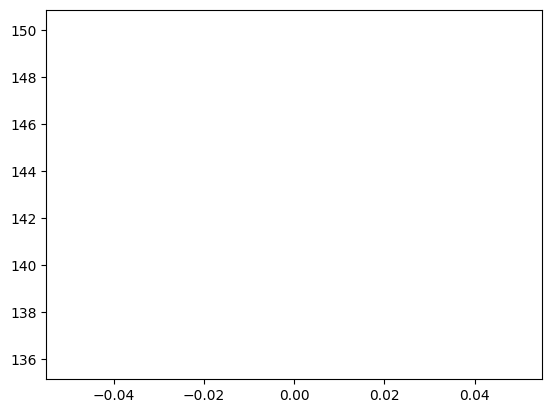

In [192]:
xTrain = torch.from_numpy(dados['x_train']/255.0).type(torch.FloatTensor).to(device)
yTrain = torch.from_numpy(dados['y_train']).type(torch.LongTensor).to(device)
xTest = torch.from_numpy(dados['x_test']/255.0).type(torch.FloatTensor).to(device)
yTest = torch.from_numpy(dados['y_test']).type(torch.LongTensor).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)
#scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[2, 4, 8], gamma=0.2)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer)

batchSize = 64
TrainDataset = TensorDataset(xTrain, yTrain)
trainDataLoader = DataLoader(TrainDataset, batch_size=batchSize, shuffle=True)

num_epochs = 50
errorList = []
for _ in tqdm(range(num_epochs)):
	model.train()
	for (x, y) in trainDataLoader:
		yPred = model(x)
		loss = criterion(yPred, y)
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
	
	model.eval()
	yPred = torch.argmax(model(xTest), 1)
	error = (yPred != yTest).sum().item()
	scheduler.step(error)
	
	errorList.append(error)
	print(error)

xs = [x for x in range(len(errorList))]
plt.plot(xs, errorList)
plt.show()

In [206]:
import cv2
numberImage = cv2.imread("number.png", cv2.IMREAD_GRAYSCALE)

In [207]:
xSingle = torch.from_numpy(numberImage/255.0).type(torch.cuda.FloatTensor)
#xSingle = torch.stack((xTest[852], ))
x = torch.stack((xSingle,))
y = model(x)
print(torch.argmax(y, 1))

tensor([4], device='cuda:0')


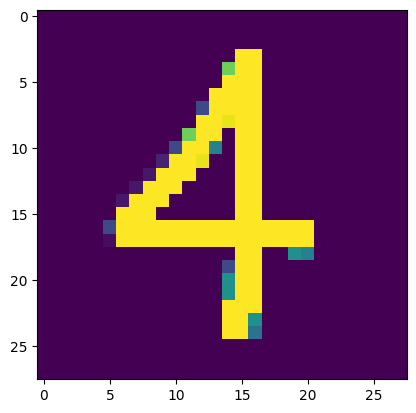

In [209]:
#plt.imshow(dados["x_test"][852])
plt.imshow(numberImage)